# Exploring trends of relationship between various data metrics and collaboration constructs 

This notebook offers an in-depth insight into the research field of MultiModal Collaboration Analytics (MMCA). MMCA research primarily focuses on comprehending collaboration behavior with the help of sensor data (e.g., audio, video), and building support systems that facilitate the development of collaboration skills. 

The post dives into state-of-the-art research in MMCA and synthesizes information addressing a range of questions, e.g.,  what kinds of data have been used in the prior research, what data features have been used from data, which data features found associated with collaboration, etc.

In [262]:
import numpy as np
import pandas as pd
from mmcalib_cscw import *
import matplotlib.pyplot as plt

## Dataset
The used dataset is a result of systematic process of literature reivew following PRISMA framework. The research papers from 2000 to 2022 are taken into consideration and in total, 143 papers were finalized.

In [263]:
# Paper with id 77 is absent (most probably deleted from the recrods)
# Paper with id 36 is deleted (it was a duplicate of 78)
lit = LiteratureDataset('5.2023 CSCW dataset_data_metrics.csv',
                       '5.2023-CSCW-paper_details.csv',
                       '5.2023-CSCW-dataset-paper_meta.csv')
papers = lit.paper_store

Populating with paper records ...
'float' object has no attribute 'replace'
Excluding paper: 75
Literature dataset is succefully populated. 
  Total papers: 143
Updated paper records with study setting, learning task, sample size and experimental study type


In [264]:
# load zotero bibliography data
bib = pd.read_csv('cscw_bib.csv')
bib.shape

(180, 87)

In [265]:
# citations records
d = pd.read_csv('5.2023-CSCW-dataset-paper_meta.csv',sep=';')

In [266]:
def get_authors(bib,paper):
    """
    Function to extract authors information from bibliography and set it for each paper.
    """
    paper_title = paper.paper_title.lower()
    
    if '.' == paper_title[-1]:
        paper_title = paper_title[:-1]
    
    for row in bib.itertuples():
        
        if row.Title.lower().strip() == paper_title.lower().strip():
            authors = row.Author
            
            if len(authors.split(';')) > 2:
                res = '{} et al., {}'.format(authors.split(';')[0], int(paper.pub_year))
            else:
                res = '{}, {}'.format(authors, int(paper.pub_year))
            return res
    return None

In [268]:
# Adding author information with each paper
for pid,paper in papers.items():
    authors = get_authors(bib,paper)
    if authors:
        paper.set_paper_authors(authors)
        #print('Set for Paper:{} \n \t Authors:{}\n'.format(paper.paper_title,authors))
    else:
        paper.set_paper_authors('<authors>')
        print('Missing citation:===>',paper.paper_title.lower())

Missing citation:===> collaboration on procedural problems may support conceptual knowledge more than you may think


Each paper details can be printed using `print_paper_record` function. The example is given below.

In [270]:
# Printing a paper record
papers[2].print_paper_record()


####################   PAPER ID: 2     ####################

Year: 2013.0
Title: Understanding collaborative program comprehension: Interlacing gaze and dialogues
Study setting: lab
Learning task: pair programming comprehension task
Study setting: G=16; I=32
Authors: Sharma, Kshitij et al., 2013
Data: {'i': 'eye gaze', 'iii': 'audio'}
Metrics: {'1': 'focus of attention', '2': 'together gaze', '3': 'dialogue episode', '4': 'gaze transitions'}
Metrics smaller: {'1': 'visual attention', '2': 'visual attention', '3': 'speech content', '4': 'eye motion'}
Metrics larger: {'1': 'gaze', '2': 'gaze', '3': 'verbal', '4': 'gaze'}
Outcomes: {'a': 'level of understanding', 'b': 'conversational features'}
Outcomes smaller: {'a': 'learning', 'b': 'communication'}
Outcomes larger: {'a': 'product', 'b': 'process'}
Outcomes instrument: {'a': 'human evaluation', 'b': 'human evaluation'}
Experimental type: NS
Results: 1+2-A: ANOVA: sig
1+2-A+B: mixed linear model: sig
4-B: ANOVA: sig
Results: [('visual a

## Basics details
Here, we provide information on publications over the years in MMCA, types of study settings investigated, sample size used, and citations of those papers.

### Publications over the years

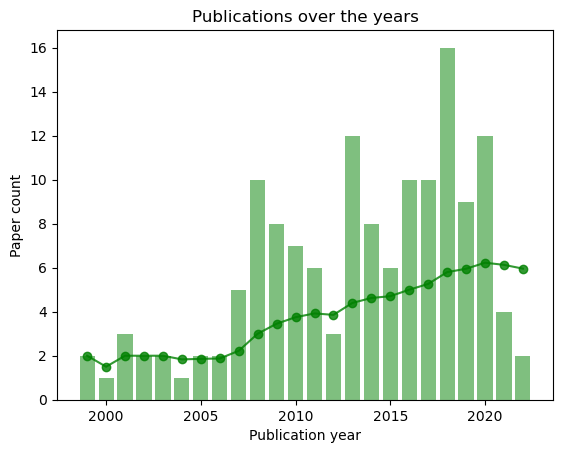

In [272]:

year_wise = {}

for paper_id,paper in papers.items():
    if paper.pub_year in year_wise.keys():
        year_wise[int(paper.pub_year)] +=1 
    else:
        year_wise[int(paper.pub_year)] = 1
        
sort_year_wise = sorted(year_wise.items())   

plt.bar([item[0] for item in sort_year_wise],[item[1] for item in sort_year_wise], 
        color='green',alpha=.5)

# trendline using expanding mean
trend = pd.DataFrame({'years':[item[0] for item in sort_year_wise],
                      'publications':[item[1] for item in sort_year_wise]})
t = trend['publications'].expanding(1).mean().to_list()

plt.plot([item[0] for item in sort_year_wise],t,linestyle='-',marker='o',color='green',alpha=.8)
plt.xlabel('Publication year')
plt.ylabel('Paper count')
plt.title('Publications over the years')
plt.savefig('mmca_pub_years.png',format='png')

In [139]:
years = [item[0] for item in sort_year_wise]

### Sample sizes used in research

Text(0.5, 9.444444444444438, 'Sample size')

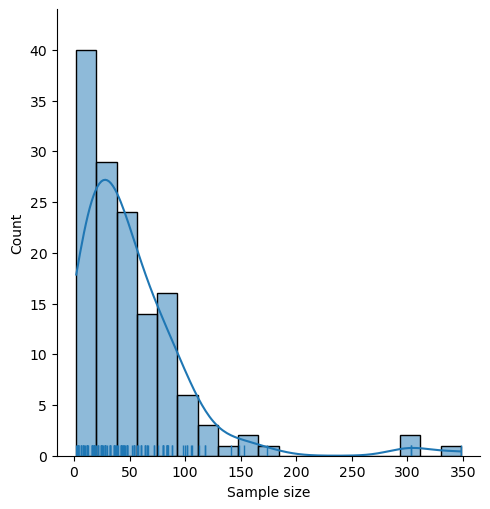

In [273]:
import re
import seaborn as sns


indi = {}
groups = {}

for id,paper in papers.items():
    g = paper.sample_size.strip()
    if ';' in g:
        parts = g.split(';')
    elif ',' in g:
        parts = g.split(',')
    else:
        parts = []
        
    if len(parts) == 0:
        parts.append(g)
        
    #print(id,parts)    
    
    for part in parts:
        if 'I' in part:
            out = re.findall(r'\D*(\d+)',part)
            #print(' Out:',out)
            if len(out) != 0:
                indi[id] = int(out[0])
                
vals = list(indi.values())


sns.displot(vals,kind='hist',kde=True,rug=True)
plt.xlabel('Sample size')

### Study settings

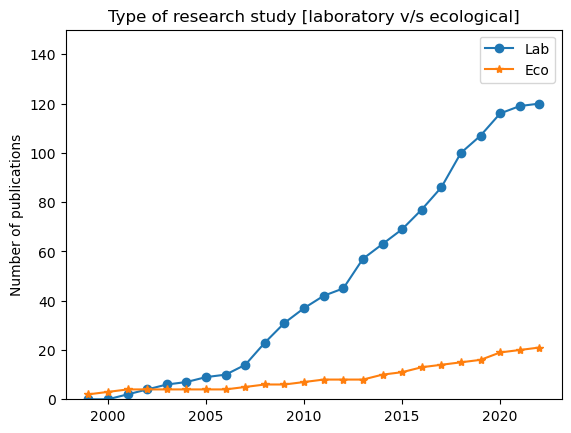

In [274]:

lab = {}
eco = {}

for year in years:
    lab[year] = 0
    eco[year] = 0
    
for pid, paper in papers.items():
    year = paper.pub_year
    
    if paper.study_setting != paper.study_setting:
        continue
    
    if 'lab' in paper.study_setting :
        lab[year] += 1
    if 'eco' in paper.study_setting :
        eco[year] += 1
           
        
plt.plot(list(lab.keys()),
             np.cumsum(list(lab.values())),
             marker = 'o',
             label='Lab')
plt.plot(list(eco.keys()),
             np.cumsum(list(eco.values())),
             marker = '*',
             label='Eco')
plt.ylim([0,150])
plt.title('Type of research study [laboratory v/s ecological]')
plt.ylabel('Number of publications')
plt.legend()

### Average citations per year

Text(0.5, 0, 'Publication year')

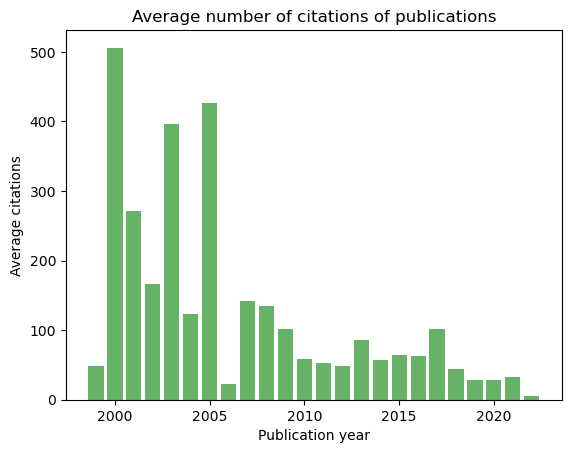

In [280]:
def get_citations(cdf,paper_id):
    return cdf.loc[cdf['ID updated']==paper_id,'citations'].to_list()

citations = {}

for year in years:
    citations[year] = []

    
for pid, paper in papers.items():
    year = paper.pub_year
    cite = get_citations(d,pid)
    citations[year].append(cite[0])
        
plt.bar(list(citations.keys()),
             [np.mean(citations[year]) for year in citations.keys()],color='green',alpha=.6)
plt.title('Average number of citations of publications')
plt.ylabel('Average citations')
plt.xlabel('Publication year')


## Multimodal data and Collaboration constructs
This section explores what kinds of data have been used, and what collaboration constructs researchers have been investigating in the last two decades in MMCA.

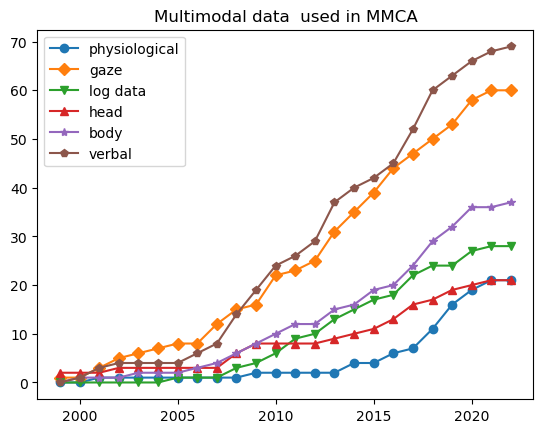

In [283]:
lit.plot_trends('metrics_lg',[],'Multimodal data  used in MMCA')

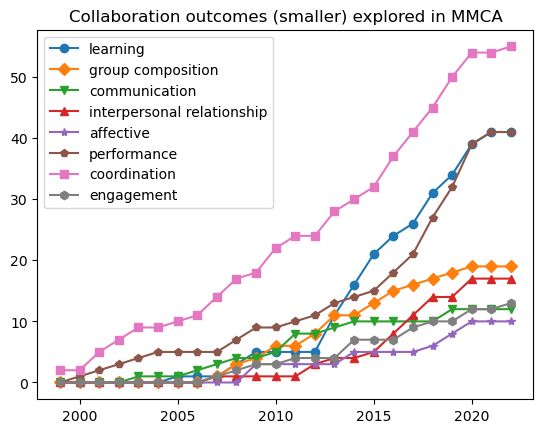

In [282]:
lit.plot_trends('outcomes_sm',[],'Collaboration outcomes (smaller) explored in MMCA')

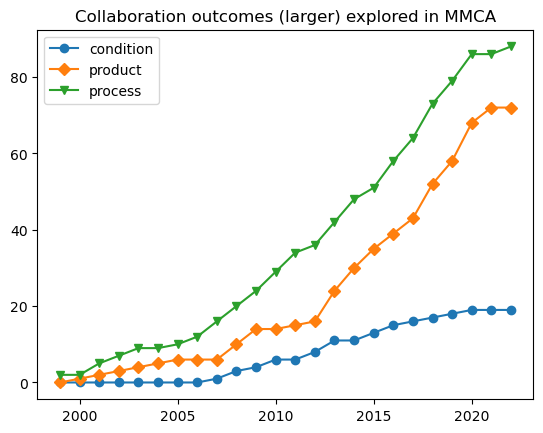

In [281]:
lit.plot_trends('outcomes_lg',[],'Collaboration outcomes (larger) explored in MMCA')

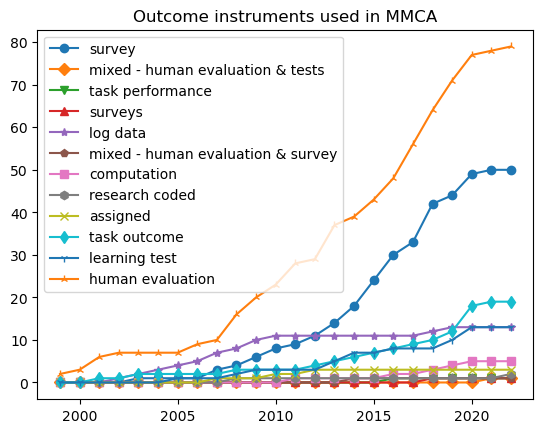

In [279]:
lit.plot_trends('outcomes_instrument',[],'Outcome instruments used in MMCA')

### Analysis method


In [286]:
from collections import defaultdict
selected_methods = ['correlation', 'regression', 'non-parametric tests',
        'machine learning', 'parametric tests']
unimodal_methods = {}
multimodal_methods = {}

methods = {}

for method in selected_methods :
    unimodal_methods[method] = {}
    multimodal_methods[method] = {}
    methods[method] = {}

    for year in years:
        unimodal_methods[method][year] = 0
        multimodal_methods[method][year] = 0
        methods[method][year] = 0

methods_smaller = defaultdict(list)

methods_together = {}


for pid, paper in papers.items():
    year = paper.pub_year
    if True:
        rels = paper.parse_relationship()
        
        paper_methods = []
    
        for rel in rels:
            method = rel[2].strip().lower()
            org = method
            
            if method in ['corrleation', 'positive correlation','negative correlation']:
                methods_smaller['correlation'].append(method)
                method = 'correlation'
                
            
            if method in ['t-test','anova']:
                methods_smaller['parametric tests'].append(method)
                method = 'parametric tests'
            
            if method in ['unsup-machine learning','unsup. machine learnig',
                          'unsup. machine learning','unsup.machine learning','unsup.machine.learning',
                          'auroc','sup.machine learning','machine learning','sup. machine learning','sup machine learning']:
                methods_smaller['machine learning'].append(method)
                method = 'machine learning'
            
            if 'auroc' in method:
                method = 'machine learning'
            
            if method in ['kruskal-wallis','mann-whitney u and kruskal-wllis tests',
                         'tukey’s hsd test','wilcoxon signed ranks test']:
                methods_smaller['non-parametric tests'].append(method)
                method = 'non-parametric tests'
            
            if method in ['qualitative','mixed linear model','minimum-width envelope','mediation','calculation','computation'] :
                continue
            
            if method == 'lme':
                method = 'regression'
            
            if len(paper.data) == 1:
                unimodal_methods[method][year] += 1
            else:
                multimodal_methods[method][year] += 1
                
            #print('Org:{}  Final:{}'.format(org,method))
            paper_methods.append(method)
            
        
        for method in set(paper_methods):
            methods[method][year] += 1
 

In [287]:
for method in methods.keys():
    print(method,':',sum(list(methods[method].values())))

correlation : 37
regression : 21
non-parametric tests : 6
machine learning : 59
parametric tests : 34


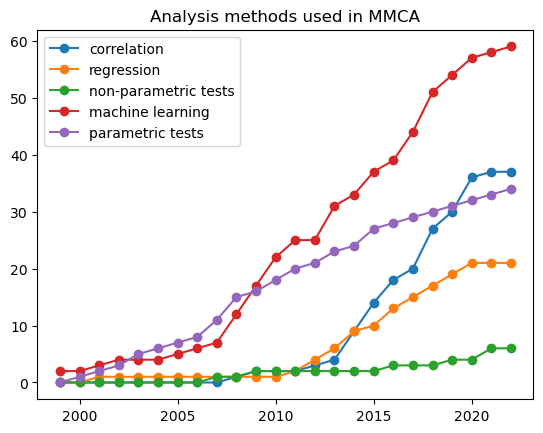

In [288]:
plt.figure()
for method in selected_methods:
    plt.plot(list(methods[method].keys()),
             np.cumsum(list(methods[method].values())),
             marker = 'o',
             label=method)
plt.title('Analysis methods used in MMCA')
plt.legend()
plt.savefig('All_analysis.png',format='png')

## Connection between multimodal metrics and collaboration constructs
This section offers information on the links found between multimodal data metrics and collaboration constructs.

In [289]:
def get_dataframe(papers):
    df = pd.DataFrame(columns=['year',
                               'paper_id',
                               'paper_title',
                               'lg_metric',
                               'sm_metric',
                               'org_metric',
                               'org_outcome',
                               'sm_outcome',
                               'lg_outcome',
                               'significance',
                               'significance_raw',
                               'analysis'])
    for pid,paper in papers.items():
        paper_id = paper.paper_id
        metrics_org = paper.get_metrics_org()
        metrics_sm = paper.get_metrics_sm()
        metrics_lg = paper.get_metrics_lg()
        outcome_sm = paper.get_outcomes_sm()
        outcome_lg = paper.get_outcomes_lg()
        outcome = paper.get_outcomes_org()   
        try:
            rels = paper.parse_relationship(item_index=True)
        except:
            print(paper.print_paper_record())
                  
        for rel in rels:
            check = 0
            if rel[0] in metrics_org.keys():
                check +=1
            if rel[0] in metrics_sm.keys():
                check +=1
            if rel[0] in metrics_lg.keys():
                check +=1
            if rel[1] in outcome_sm.keys():
                check +=1 
            if rel[1] in outcome_lg.keys():
                check +=1 
            if rel[1] in outcome.keys():
                check +=1

            analysis = rel[2]
            analysis = analysis.strip()
            
            if analysis == 'sup.machine learning':
                analysis = 'sup. machine learning'
            if analysis == 'unsup.machine learning':
                analysis = 'unsup. machine learning'
            if analysis == 'anova':
                analysis = 'ANOVA'
                
            if check == 6: 
                #print(paper_id)
            
                
                significance = 0 if 'non' in rel[3] else 1
                tdf = pd.DataFrame({'year':paper.get_pub_year(),'paper_id':paper_id,'paper_title':paper.paper_title,
                                    'authors':paper.authors,
                                    'lg_metric':metrics_lg[rel[0]],'sm_metric':metrics_sm[rel[0]],
                                'org_metric':metrics_org[rel[0]],'lg_outcome':outcome_lg[rel[1]],
                                'sm_outcome':outcome_sm[rel[1]],'org_outcome':outcome[rel[1]],
                                'significance':significance,'significance_raw':rel[3],
                                    'analysis':analysis},index=[0])
                df = pd.concat([df,tdf],axis=0)    
            else:
                print('Discarding paper:',paper_id)
    print(df.shape)
    df.drop_duplicates(inplace=True)
    return df

In [290]:
def get_topN(d,N=10):
    d['rel'] = d['lg_metric']+ '-' + d['sm_outcome']
    rel_dict = d['rel'].value_counts().to_dict()
    sorted_d = sorted(rel_dict.items(), key=lambda x: x[1], reverse=True)
    if N == -1:
        return dict(sorted_d)
    else:
        return dict(sorted_d[:N])
    
def get_leastN(d,N=10):
    d['rel'] = d['lg_metric']+ '-' + d['sm_outcome']
    rel_dict = d['rel'].value_counts().to_dict()
    sorted_d = sorted(rel_dict.items(), key=lambda x: x[1])
    if N == -1:
        return dict(sorted_d)
    else:
        return dict(sorted_d[:N])
def get_top_analysisN(d,N=10):
    d['analysis'] = d['analysis'].str.lower()
    rel_dict = d['analysis'].value_counts().to_dict()
    sorted_d = sorted(rel_dict.items(), key=lambda x: x[1], reverse=True)
    if N == -1:
        return dict(sorted_d)
    else:
        return dict(sorted_d[:N])

In [291]:
df = get_dataframe(papers)
df = df.astype({"significance": str})
df['temp']  = df['lg_metric'] + '_'+ df['sm_outcome'] +'_' + df['significance']
df.to_csv('Papers_structured_record_cscw.csv',index=False)

Discarding paper: 93
(606, 13)


In [47]:
#df.drop_duplicates(subset=['paper_id','lg_metric','sm_outcome','significance'],inplace=True)

## Fetching related papers information with authors names
The following code provides an interface to fetch the papers which have investigated

In [293]:
outcome_lg_unique = lit.get_unique_values('outcomes_lg')
outcome_sm_unique = lit.get_unique_values('outcomes_sm')
metric_sm_unique = lit.get_unique_values('metrics_sm')

In [294]:
df['title_authors'] = df['paper_title'] + ' (' + df['authors'] +')' 

In [295]:
indicators_df = pd.DataFrame(columns=['outcome_larger','outcome_smaller',
                                      'data_metric','data_larger','org_metric',
                                      'org_outcome','studies'])

for o_lg in outcome_lg_unique:
    for o_sm in outcome_sm_unique:
        for row in df.itertuples():
            if row.lg_outcome == o_lg and row.sm_outcome == o_sm:

                tmp = pd.DataFrame({
                    'outcome_larger':row.lg_outcome,
                    'outcome_smaller':row.sm_outcome,
                    'data_metric':row.sm_metric,
                    'data_larger':row.lg_metric,
                    'org_outcome':row.org_outcome,
                    'org_metric':row.org_metric,
                    'studies':row.paper_title + ' ('+ row.authors + ')'},index=[0])
                indicators_df = pd.concat([indicators_df,tmp])

In [296]:
indicators_df.reset_index(inplace=True)
indicators_df.to_csv('indicators_for_table_8jan.csv')
#indicators_df = pd.read_csv('indicators_for_table_8jan.csv')

In [297]:
def get_related_papers(indicators_df, lg_metric=None,sm_metric=None,sm_outcome=None,print_org_metric=False,unique=False):
    df = indicators_df
    if lg_metric is not None:
        df = indicators_df.loc[indicators_df['data_larger'] == lg_metric,:]
    
    if sm_metric is not None:
        df = df.loc[df['data_metric'] == sm_metric,:]
        
    if sm_outcome is not None:
        df = df.loc[df['outcome_smaller'] == sm_outcome,:]
        
    if print_org_metric:
        df['title_metric_authors'] = df['studies'] + ' [data used:' + df['org_metric'] + ']'
    else:
        df['title_metric_authors'] = df['studies']
        
    if unique:
        df.drop_duplicates(subset=['studies'],inplace=True)
        print('No. of papers:',df.shape[0])
        
    print("\n\n".join(set(df['title_metric_authors'].to_list())))

In [298]:
# example getting papers found relationship between physiological data and engagement
get_related_papers(indicators_df,lg_metric='physiological',
                   sm_outcome='engagement',
                   print_org_metric=True)

What does physiological synchrony reveal about metacognitive experiences and group performance? (Dindar, Muhterem et al., 2020) [data used:physiological synchrony (pc]

Shared Experiences of Technology and Trust: An Experimental Study of Physiological Compliance Between Active and Passive Users in Technology-Mediated Collaborative Encounters (Montague, Enid et al., 2014) [data used:instantaneous derivative matching (idm]

Shared Experiences of Technology and Trust: An Experimental Study of Physiological Compliance Between Active and Passive Users in Technology-Mediated Collaborative Encounters (Montague, Enid et al., 2014) [data used:directional agreement (da]

Shared Experiences of Technology and Trust: An Experimental Study of Physiological Compliance Between Active and Passive Users in Technology-Mediated Collaborative Encounters (Montague, Enid et al., 2014) [data used:weighted coherence (wc]

Brain-to-Brain Synchrony Tracks Real-World Dynamic Group Interactions in the Classroom (D

## Generating dataframe for plotting in R
The following code generates a dataframe for use with R to plot a relationship diagram with pie chart.

In [299]:
def get_metric_outcome_dataframe(df):
    relationship = df.temp.value_counts().to_dict()
    metric_outcome = {}

    for key,value in relationship.items():

        metric = key.split('_')[0]
        outcome = key.split('_')[1]
        
        if metric not in metric_outcome.keys():
            metric_outcome[metric] = {}
            
        if outcome not in metric_outcome[metric].keys():
            metric_outcome[metric][outcome] = {}
             
        if key.split('_')[2] == '1':
            metric_outcome[metric][outcome]['sig'] = value
            
        if key.split('_')[2] == '0':
            metric_outcome[metric][outcome]['non'] = value
        
    scatterpie_df = pd.DataFrame(columns=['x','y','data','outcome','sig','non'])
    
    metric_labels = []
    outcome_lables = []
    
    for metric in metric_outcome.keys():
        if metric not in metric_labels:

            metric_labels.append(metric)
        
        for out in metric_outcome[metric].keys():
            record = {}
            
            if out not in outcome_lables:
                outcome_lables.append(out)
            record['data'] = metric
            record['outcome'] = out
            record['x'] = 10*(metric_labels.index(metric) + 1)
            record['y'] = 10*(outcome_lables.index(out) + 1)
            
            record['sig'] = 0
            record['non'] = 0
            
            if 'sig' in metric_outcome[metric][out].keys():
                record['sig'] = metric_outcome[metric][out]['sig']
                
            if 'non' in metric_outcome[metric][out].keys():
                record['non'] = metric_outcome[metric][out]['non']
            
            scatterpie_df = scatterpie_df.append(record,ignore_index=True)
            
            
    return scatterpie_df,metric_labels,outcome_lables

In [300]:
s,m,o = get_metric_outcome_dataframe(df)
s['radius'] = s['sig'] + s['non']
s.to_csv('scatterpie_data_cscw_final.csv',index=False)

/var/folders/b9/rhn78y315812dj7gfcgwwp9c0000gp/T/ipykernel_72447/2810130161.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scatterpie_df = scatterpie_df.append(record,ignore_index=True)
/var/folders/b9/rhn78y315812dj7gfcgwwp9c0000gp/T/ipykernel_72447/2810130161.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scatterpie_df = scatterpie_df.append(record,ignore_index=True)
/var/folders/b9/rhn78y315812dj7gfcgwwp9c0000gp/T/ipykernel_72447/2810130161.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scatterpie_df = scatterpie_df.append(record,ignore_index=True)
/var/folders/b9/rhn78y315812dj7gfcgwwp9c0000gp/T/ipykernel_72447/2810130161.py:51: FutureWarning: The frame.append method is deprecated and will be removed f

### following script used to generate relationship diagram
```r
library(ggplot2)
library(scatterpie)
sd <- read.csv('scatterpie_data_cscw_final.csv')
sd$size <- sd$radius

ggplot() + geom_scatterpie(data = sd, aes(x = x, y = y, r = size / 10),
                    cols = c("sig", "non"), color = NA, alpha = 0.9) +
    geom_scatterpie_legend(seq(1, ceiling(max(sd$size) / 10), length = 4),
                           x = 1, y = 1, labeller = function(x) x * 10) +
    coord_equal()

```